### Objective :

We are trying to create classification model which classifies individuals in two classes based on Having Heart disease or not . we have also performed Comparison of accuacy among various model to select better model .

In [6]:
## Module used 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
## To Handle Sklearn Warning 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [8]:
## Reading from CSV line
df = pd.read_csv("heart.csv")
print("Data Sample:")
df[:20]

Data Sample:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### Heart Dataset Description 

* 1. age - age in years <br>
* 2. sex - (1 = male; 0 = female) <br>
* 3. cp - chest pain type <br>
* 4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* 5. chol - serum cholestoral in mg/dl <br>
* 6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* 7. restecg - resting electrocardiographic results <br>
* 8. thalach - maximum heart rate achieved <br>
* 9. exang - exercise induced angina (1 = yes; 0 = no) <br>
* 10. oldpeak - ST depression induced by exercise relative to rest <br>
* 11. slope - the slope of the peak exercise ST segment <br>
* 12. ca - number of major vessels (0-3) colored by flourosopy <br>
* 13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* 14. target - have disease or not (1=yes, 0=no)

### DataSet Exploration 

1    526
0    499
Name: target, dtype: int64


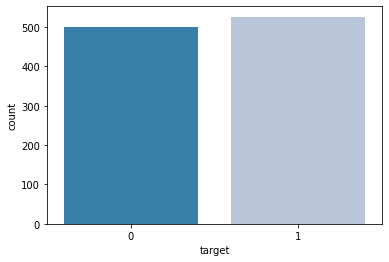

In [9]:
## Data Distribution 
print(df.target.value_counts())
sns.countplot(x="target", data=df, palette="PuBu_r")
plt.show()

In [10]:
NoDisease = len(df[df.target == 0])
HaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


<AxesSubplot:>

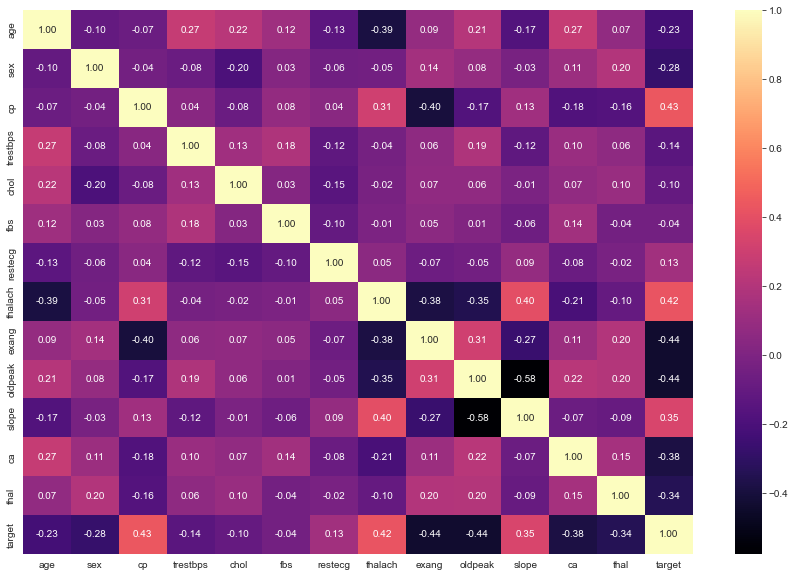

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

### Variation of Number of patient with respect to age 

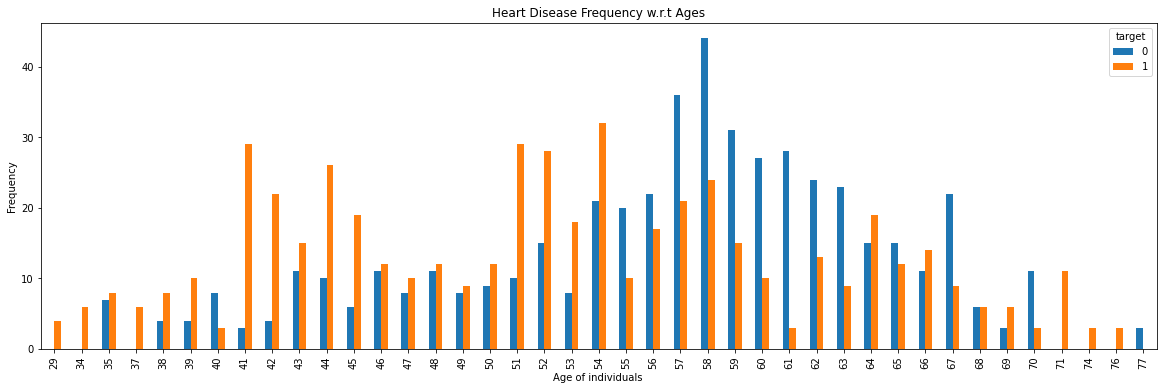

In [11]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency w.r.t Ages')
plt.xlabel('Age of individuals ')
plt.ylabel('Frequency')
plt.show()

### Variation of Number of patient with respect to Sex

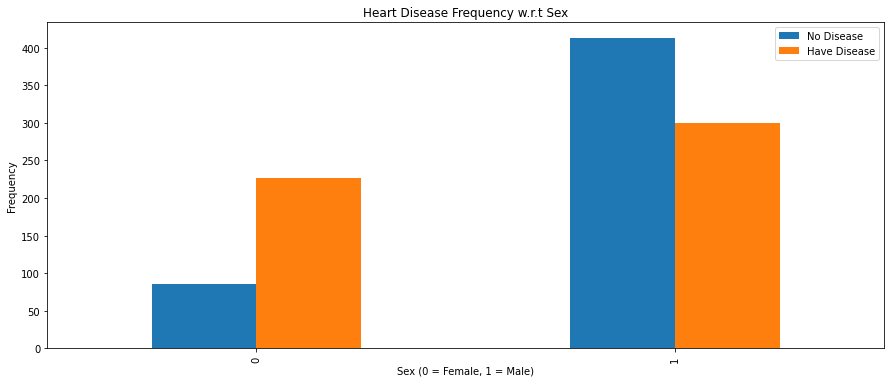

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency w.r.t Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

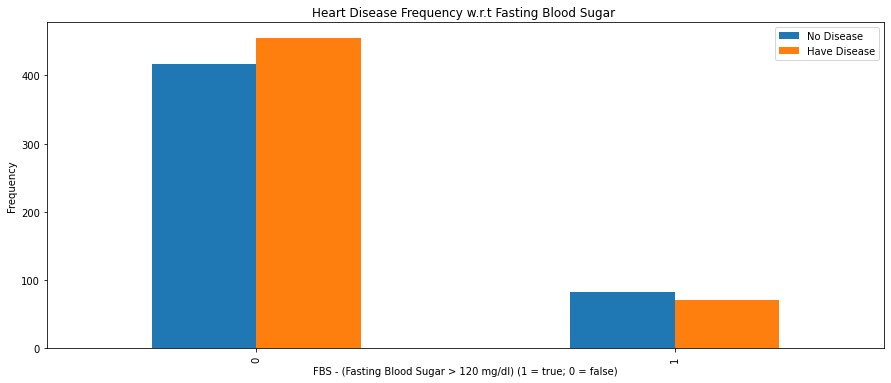

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency w.r.t Fasting Blood Sugar ')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

1    713
0    312
Name: sex, dtype: int64


<BarContainer object of 2 artists>

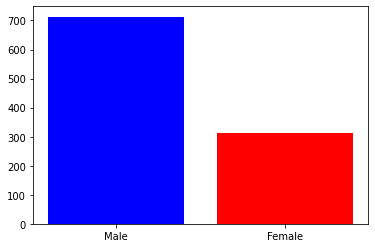

In [14]:
## Male Female Ratio 0 = Female ,1 = male 
print(df.sex.value_counts())
array = np.array(df.sex.value_counts())
category = ["Male" , "Female"]
values = [array[0] , array[1]]
plt.bar(category , values , color = ['blue' , 'red'] , align = 'center' )

In [15]:
print(df.groupby('target').head())
df.groupby('target').mean()

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   0       125   212    0        1      168      0      1.0   
1    53    1   0       140   203    1        0      155      1      3.1   
2    70    1   0       145   174    0        1      125      1      2.6   
3    61    1   0       148   203    0        1      161      0      0.0   
4    62    0   0       138   294    1        1      106      0      1.9   
5    58    0   0       100   248    0        0      122      0      1.0   
10   71    0   0       112   149    0        1      125      0      1.6   
12   34    0   1       118   210    0        1      192      0      0.7   
15   34    0   1       118   210    0        1      192      0      0.7   
16   51    0   2       140   308    0        0      142      0      1.5   

    slope  ca  thal  target  
0       2   2     3       0  
1       0   0     3       0  
2       0   0     3       0  
3       2   1     3       0  
4       1   3     2     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


#### Preparation of Trainig Data and Testing Data in 6:4 ratio

In [16]:
y = df['target']
x = df.drop(['target'],axis = 1)
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = .40 , random_state = 4)
print("Training Dataset size: ",x_train.shape)
print("Testing DatasetSize: ",x_test.shape)
accuracies = {}

Training Dataset size:  (615, 13)
Testing DatasetSize:  (410, 13)


### Logistic Regression 

In [17]:
## Logistic Regression Using Sklearn 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_y_pred = lr_model.predict(x_test)
acc = accuracy_score(y_test, lr_y_pred)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}%".format(acc))

Test Accuracy 85.1220%


### K-Nearest Neighbor

Best K =  2
KNN Accuracy Score 69.7560975609756


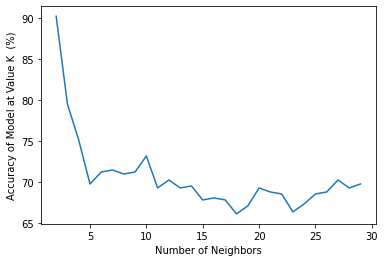

In [18]:
## Classification using KNN Model
from sklearn.neighbors import KNeighborsClassifier
## Checking for optimal value of Neighbors
best_k = 2;
temp = []
max_accuracy = 0;
knn_y_pred = 0
for i in range(2,30):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train , y_train)
    knn_y_pred = knn_model.predict(x_test)
    acc = accuracy_score(y_test, knn_y_pred)*100
    temp.append(acc)
    if max_accuracy<acc:
        max_accuracy = acc
        best_k = i
        knn_y_pred = knn_y_pred
print("Best K = ",best_k)
plt.plot(range(2,30), temp)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy of Model at Value K  (%)")
accuracies['KNN'] = max_accuracy
print("KNN Accuracy Score",acc)

### Naive Bayes Classifier

In [19]:
## Classification using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_y_pred = nb_model.predict(x_test)
acc = accuracy_score(y_test, nb_y_pred)*100
accuracies['Naive Bayes'] = acc
print("Naive Bayes Classifier Accuracy Score",acc)

Naive Bayes Classifier Accuracy Score 80.73170731707317


### Decision Tree 

In [20]:
## Classification using Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train , y_train)
dt_y_pred = dt_model.predict(x_test)
acc = accuracy_score(y_test, dt_y_pred)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Algorithm Accuracy Score",acc)

Decision Tree Algorithm Accuracy Score 94.6341463414634


### Random Forest 

In [21]:
# Classification using Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
acc = accuracy_score(y_test, rf_y_pred)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score",acc)

Random Forest Algorithm Accuracy Score 97.80487804878048


### Comparision of Models 

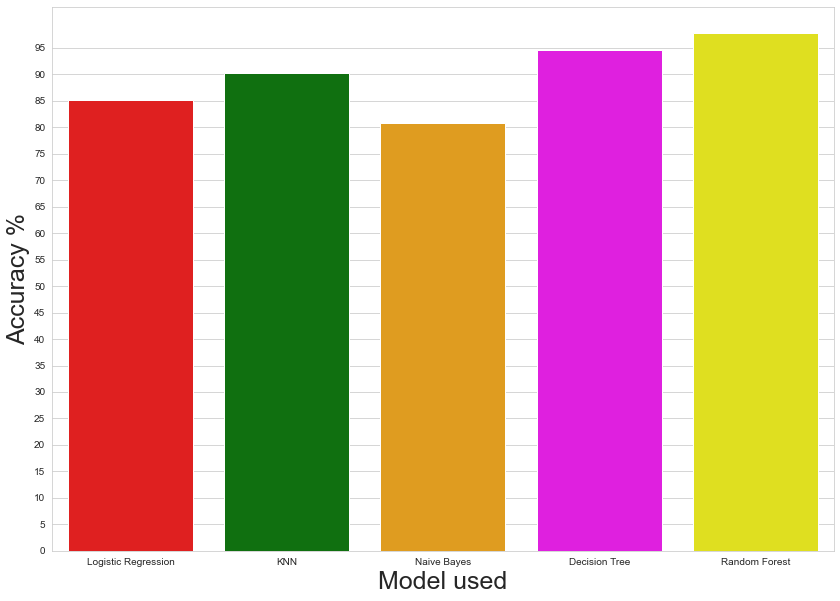

{'Logistic Regression': 85.1219512195122, 'KNN': 90.2439024390244, 'Naive Bayes': 80.73170731707317, 'Decision Tree': 94.6341463414634, 'Random Forest': 97.80487804878048}


In [30]:
## Comparision of Models 
colors = ['red' ,'green', 'orange','magenta','yellow','black','purple']
category = [i for i in accuracies.keys()]
value = [i for i in accuracies.values()]
sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %",fontsize=25)
plt.xlabel("Model used",fontsize=25)
sns.barplot(x=category, y=value, palette=colors)
plt.show()

### Confusion Matrix

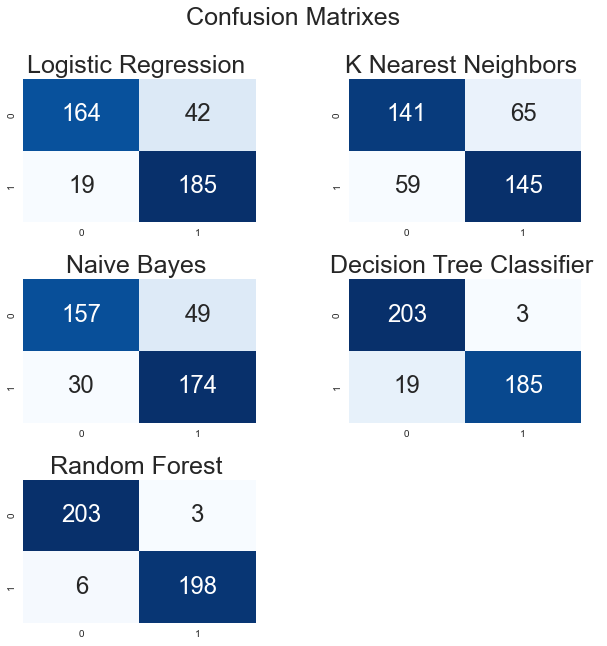

In [29]:
cm_lr = confusion_matrix(y_test,lr_y_pred)
cm_knn = confusion_matrix(y_test,knn_y_pred)
cm_nb = confusion_matrix(y_test,nb_y_pred)
cm_dt = confusion_matrix(y_test,dt_y_pred)
cm_rf = confusion_matrix(y_test,rf_y_pred)

plt.figure(figsize=(10,10))
plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(3,2,1)
plt.title("Logistic Regression ",fontsize=25)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,2,2)
plt.title("K Nearest Neighbors ",fontsize=25)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,2,3)
plt.title("Naive Bayes ",fontsize=25)
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,2,4)
plt.title("Decision Tree Classifier ",fontsize=25)
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(3,2,5)
plt.title("Random Forest ",fontsize=25)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

### Conclusion

After Calculating classification accuracy for KNN , Random forest classification , Decision tree , Naive Bayes algorithm ,Logistic Regression on Heart disease dataset , it can be clearly obserced that Performance of Random Forest algorithm is better than among all algorithms used with 97.80487804878048 % accuracy. 